<a href="https://colab.research.google.com/github/gabrielawad/Fundamentos-de-optimizacion-lineal/blob/main/Taller_07_decisiones_secuenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## «La ausencia de evidencia no es evidencia de ausencia».
### [Carl Sagan](https://es.wikipedia.org/wiki/Carl_Sagan)

# Taller 07 decisiones secuenciales interrelacionadas

En este taller aprenderá los conceptos básicos de as decisiones secuenciales interrelacionadas.

## Ejemplo 00

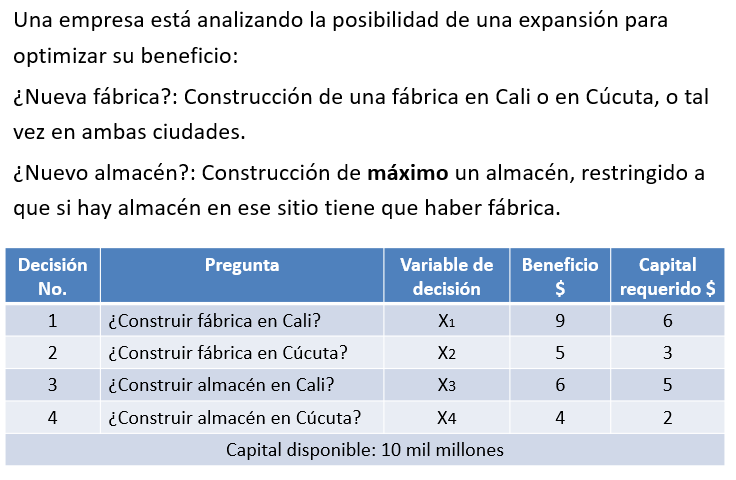

In [ ]:
# Importar las librerías que se van a utilizar
import cvxpy as cvx

# Crear las variables a optimizar
fabrica_cali = cvx.Variable(boolean =True)
fabrica_cucuta = cvx.Variable(boolean =True)
almacen_cali = cvx.Variable(boolean =True)
almacen_cucuta = cvx.Variable(boolean =True)

# definir la función objetivo para maximizar el ingreso
obj_fabAlm = cvx.Maximize(9*fabrica_cali + 5*fabrica_cucuta + 6*almacen_cali +\
                          4*almacen_cucuta)

# Establecer las restricciones
restricciones_fabAlm = [
    # Restricción de capital disponible
    6*fabrica_cali + 3*fabrica_cucuta + 5*almacen_cali + 2*almacen_cucuta <= 10,

    # Restricción de máximo un almacen
    almacen_cali + almacen_cucuta <= 1,

    # Restricción de fábrica para construir almacén
    almacen_cali <= fabrica_cali,
    almacen_cucuta <= fabrica_cucuta,
 ]

# Configurar el problema
prob_fabAlm = cvx.Problem(obj_fabAlm, restricciones_fabAlm)

# Obtener el valor óptimo
prob_fabAlm.solve()

# Mostrar el estado de la solución y el valor óptimo de la función objetivo
print("Estado de la solución:", prob_fabAlm.status, "\n",
      "Valor máximo:", "%.0f"% prob_fabAlm.value)

# Mostrar los valores óptimos de las variables de decisión
print ("Valor óptimo de fabrica_cali:", "%.0f"% fabrica_cali.value)
print("Valor óptimo de fabrica_cucuta:", "%.0f"% fabrica_cucuta.value)
print("Valor óptimo de almacen_cali:", "%.0f"% almacen_cali.value)
print("Valor óptimo de almacen_cucuta:", "%.0f"% almacen_cucuta.value)

## Ejemplo 01

### primera parte

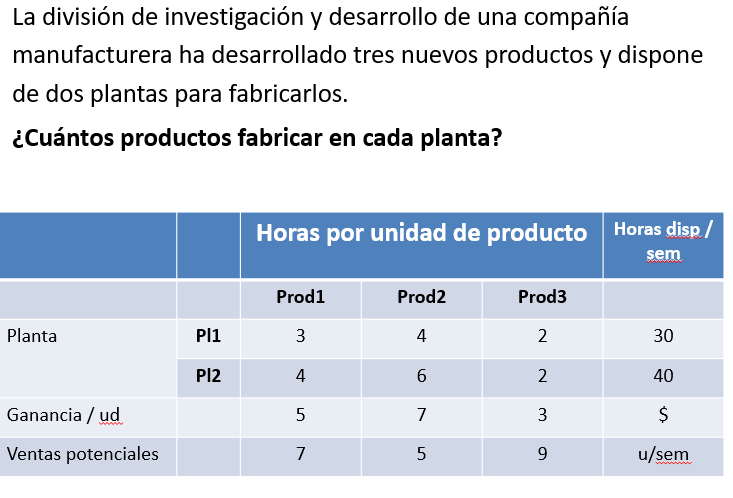

In [ ]:
# Importar las librerías requeridas
import cvxpy as cvx

# Crear las variables a optimizar
pla1_prod1 = cvx.Variable(name = "planta 1 - producto 1", integer = True)
pla1_prod2 = cvx.Variable(name = "planta 1 - producto 2", integer = True)
pla1_prod3 = cvx.Variable(name = "planta 1 - producto 3", integer = True)

pla2_prod1 = cvx.Variable(name = "planta 2 - producto 1", integer = True)
pla2_prod2 = cvx.Variable(name = "planta 2 - producto 2", integer = True)
pla2_prod3 = cvx.Variable(name = "planta 2 - producto 3", integer = True)

# Definir la función objetivo
obj_prod = cvx.Maximize(
    5 * (pla1_prod1 + pla2_prod1) +
    7 * (pla1_prod2 + pla2_prod2) +
    3 * (pla1_prod3 + pla2_prod3)
)

# Establecer las restricciones
rest_prod = [
    #Restriciones de capacidad
    3 * pla1_prod1 + 4 * pla1_prod2 + 2*pla1_prod3 <= 30,
    4 * pla2_prod1 + 6 * pla2_prod2 + 2 * pla2_prod3 <= 40,

    # Restricciones de mercado
    pla1_prod1 + pla2_prod1 <= 7,
    pla1_prod2 + pla2_prod2 <= 5,
    pla1_prod3 + pla2_prod3 <= 9,

    # Restricciones de no negatividad
    pla1_prod1 >= 0,
    pla1_prod2 >= 0,
    pla1_prod3 >= 0,
    pla2_prod1 >= 0,
    pla2_prod2 >= 0,
    pla2_prod3 >= 0
]

# Configurar el problema a resolver
prob_prod = cvx.Problem(obj_prod, rest_prod)

# Resolver el problema
prob_prod.solve()

# Miras el estatus de la solución
print(f"El estado de la solución es: {prob_prod.status}")

# Imprimir el valor óptimo de la función objetivo
print(f"El valor óptimo de la función objetivo es: {obj_prod.value} \n")

# Mostrar el valor óptimo de las variables
print("El valor óptimo de las variables es:")
print(f"Planta 1 - Producto 1: {pla1_prod1.value}")
print(f"Planta 1 - Producto 2: {pla1_prod2.value}")
print(f"Planta 1 - Producto 3: {pla1_prod3.value} \n")
print(f"Planta 2 - Producto 1: {pla2_prod1.value}")
print(f"Planta 2 - Producto 2: {pla2_prod2.value}")
print(f"Planta 2 - Producto 3: {pla2_prod3.value}")

### segunda parte

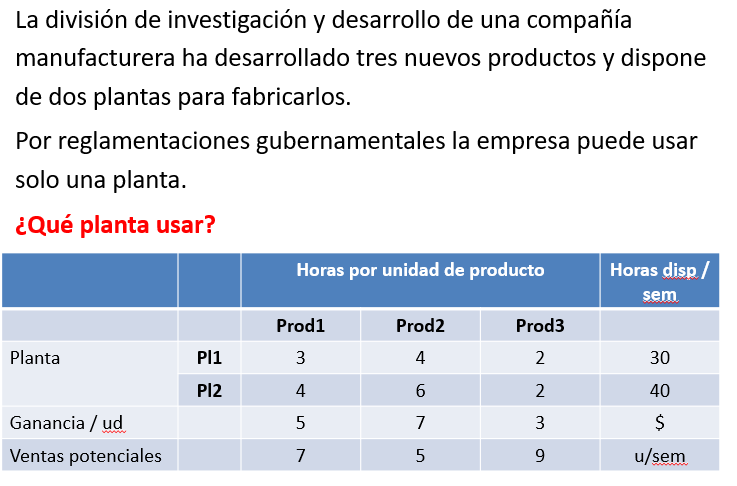

In [ ]:
# Importar las librerías requeridas
import cvxpy as cvx

# Crear las variables a optimizar
pla1_prod1 = cvx.Variable(name = "planta 1 - producto 1", integer = True)
pla1_prod2 = cvx.Variable(name = "planta 1 - producto 2", integer = True)
pla1_prod3 = cvx.Variable(name = "planta 1 - producto 3", integer = True)

pla2_prod1 = cvx.Variable(name = "planta 2 - producto 1", integer = True)
pla2_prod2 = cvx.Variable(name = "planta 2 - producto 2", integer = True)
pla2_prod3 = cvx.Variable(name = "planta 2 - producto 3", integer = True)

# Crear variable booleana para definir la planta que se va a usar
y = cvx.Variable(name = "y", boolean = True)

# Definir la función objetivo
obj_prod_amb = cvx.Maximize(
    5 * (pla1_prod1 + pla2_prod1) +
    7 * (pla1_prod2 + pla2_prod2) +
    3 * (pla1_prod3 + pla2_prod3)
)

# Establecer las restricciones
rest_prod_amb = [
    #Restriciones de capacidad
    3 * pla1_prod1 + 4 * pla1_prod2 + 2*pla1_prod3 <= 30 * y,
    4 * pla2_prod1 + 6 * pla2_prod2 + 2 * pla2_prod3 <= 40 * (1-y),

    # Restricciones de mercado
    pla1_prod1 + pla2_prod1 <= 7,
    pla1_prod2 + pla2_prod2 <= 5,
    pla1_prod3 + pla2_prod3 <= 9,

    # Restricciones de no negatividad
    pla1_prod1 >= 0,
    pla1_prod2 >= 0,
    pla1_prod3 >= 0,
    pla2_prod1 >= 0,
    pla2_prod2 >= 0,
    pla2_prod3 >= 0
]

# Configurar el problema a resolver
prob_prod_amb = cvx.Problem(obj_prod_amb, rest_prod_amb)

# Resolver el problema
prob_prod_amb.solve()

# Miras el estatus de la solución
print(f"El estado de la solución es: {prob_prod_amb.status}")

# Imprimir el valor óptimo de la función objetivo
print(f"El valor óptimo de la función objetivo es: {obj_prod_amb.value} \n")

# Mostrar el valor óptimo de las variables
print("El valor óptimo de las variables es:")
print(f"Planta 1 - Producto 1: {pla1_prod1.value}")
print(f"Planta 1 - Producto 2: {pla1_prod2.value}")
print(f"Planta 1 - Producto 3: {pla1_prod3.value} \n")
print(f"Planta 2 - Producto 1: {pla2_prod1.value}")
print(f"Planta 2 - Producto 2: {pla2_prod2.value}")
print(f"Planta 2 - Producto 3: {pla2_prod3.value}")

### tercera parte

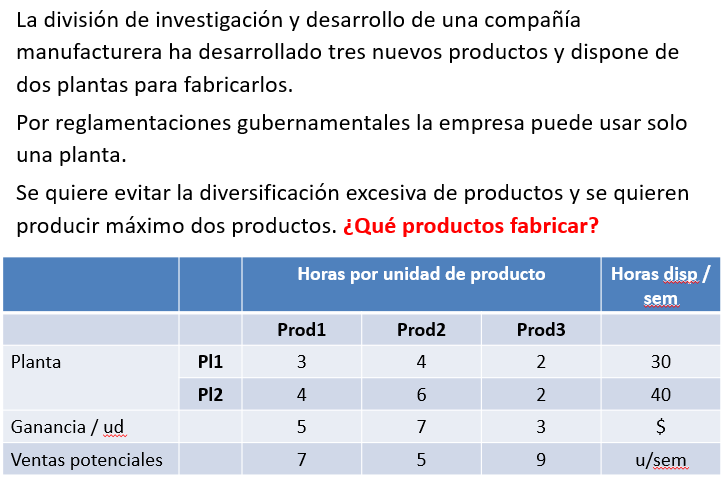

In [ ]:
# Importar las librerías requeridas
import cvxpy as cvx

# Crear las variables a optimizar
pla1_prod1 = cvx.Variable(name = "planta 1 - producto 1", integer = True)
pla1_prod2 = cvx.Variable(name = "planta 1 - producto 2", integer = True)
pla1_prod3 = cvx.Variable(name = "planta 1 - producto 3", integer = True)

pla2_prod1 = cvx.Variable(name = "planta 2 - producto 1", integer = True)
pla2_prod2 = cvx.Variable(name = "planta 2 - producto 2", integer = True)
pla2_prod3 = cvx.Variable(name = "planta 2 - producto 3", integer = True)

# Crear variable booleana para definir la planta que se va a usar
y = cvx.Variable(name = "y", boolean = True)

# Crear variables booleanas para definir los productos a fabricar
w1 = cvx.Variable(name = "w1", boolean = True)
w2 = cvx.Variable(name = "w2", boolean = True)
w3 = cvx.Variable(name = "w3", boolean = True)

# Definir la función objetivo
obj = cvx.Maximize(
    5 * (pla1_prod1 + pla2_prod1) +
    7 * (pla1_prod2 + pla2_prod2) +
    3 * (pla1_prod3 + pla2_prod3)
)

# Establecer las restricciones
rest = [
    #Restriciones de capacidad
    3 * pla1_prod1 + 4 * pla1_prod2 + 2*pla1_prod3 <= 30 * y,
    4 * pla2_prod1 + 6 * pla2_prod2 + 2 * pla2_prod3 <= 40 * (1-y),

    # Restricciones de mercado
    pla1_prod1 + pla2_prod1 <= 7 * w1,
    pla1_prod2 + pla2_prod2 <= 5 * w2,
    pla1_prod3 + pla2_prod3 <= 9 * w3,

    # Restricción de productos
    w1 + w2 + w3 <= 2,

    # Restricciones de no negatividad
    pla1_prod1 >= 0,
    pla1_prod2 >= 0,
    pla1_prod3 >= 0,
    pla2_prod1 >= 0,
    pla2_prod2 >= 0,
    pla2_prod3 >= 0
]

# Configurar el problema a resolver
prob = cvx.Problem(obj, rest)

# Resolver el problema
prob.solve()

# Miras el estatus de la solución
print(f"El estado de la solución es: {prob.status}")

# Imprimir el valor óptimo de la función objetivo
print(f"El valor óptimo de la función objetivo es: {obj.value} \n")

# Mostrar el valor óptimo de las variables
print("El valor óptimo de las variables es:")
print(f"Planta 1 - Producto 1: {pla1_prod1.value}")
print(f"Planta 1 - Producto 2: {pla1_prod2.value}")
print(f"Planta 1 - Producto 3: {pla1_prod3.value} \n")
print(f"Planta 2 - Producto 1: {pla2_prod1.value}")
print(f"Planta 2 - Producto 2: {pla2_prod2.value}")
print(f"Planta 2 - Producto 3: {pla2_prod3.value}")

# Ejercicios

Resolver los siguientes ejercicios con CVXPY.

## Ejercicio 00

La empresa agrícola colombiana tiene tres granjas ubicadas en diferentes regiones del país: Granja El Paraíso en Antioquia, Granja La Esmeralda en Cauca y Granja Los Andes en Nariño.

Estas granjas producen café, banano y flores en diferentes cantidades. Granja El Paraíso produce 100 toneladas de café, 50 toneladas de banano y 30 toneladas de flores. Granja La Esmeralda produce 80 toneladas de café, 60 toneladas de banano y 40 toneladas de flores. Granja Los Andes produce 120 toneladas de café, 70 toneladas de banano y 50 toneladas de flores.

La empresa distribuye estos productos a tres mercados principales en el país: el Mercado de Corabastos en Bogotá, el Mercado Mayorista en Medellín y el Mercado Campesino en Cali.

Cada mercado tiene una demanda específica de productos. El Mercado de Corabastos requiere 80 toneladas de café, 40 toneladas de banano y 20 toneladas de flores. El Mercado Mayorista necesita 100 toneladas de café, 60 toneladas de banano y 30 toneladas de flores. El Mercado Campesino demanda 90 toneladas de café, 50 toneladas de banano y 40 toneladas de flores.

Los costos de transporte varían dependiendo de la distancia entre las granjas y los mercados. Transportar productos desde Granja El Paraíso al Mercado de Corabastos cuesta \$50 por tonelada, al Mercado Mayorista cuesta \$60 por tonelada y al Mercado Campesino cuesta \$70 por tonelada. Desde Granja La Esmeralda, los costos son \$40 por tonelada al Mercado de Corabastos, \$50 por tonelada al Mercado Mayorista y \$60 por tonelada al Mercado Campesino. Finalmente, desde Granja Los Andes, los costos son \$55 por tonelada al Mercado de Corabastos, \$65 por tonelada al Mercado Mayorista y \$75 por tonelada al Mercado Campesino.


Objetivo: minimizar los costos totales de transporte.

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 01

Una empresa construye aviones comerciales para varias aerolíneas en todo el mundo. La última etapa del proceso de producción consiste en fabricar los motores de turbina e instalarlos.

Se debe programar la producción para los próximos cuatro meses (cada mes tiene una demanda específica), teniendo en cuenta que las instalaciones disponibles limitan el número de motores que se pueden fabricar cada mes. Es posible guardar producción de un mes a otro, pero esto tiene un costo.

El gerente de producción quiere calcular la programación del número de motores que se deben fabricar en cada uno de los cuatro meses, de manera que se minimicen los costos totales de producción y almacenamiento.

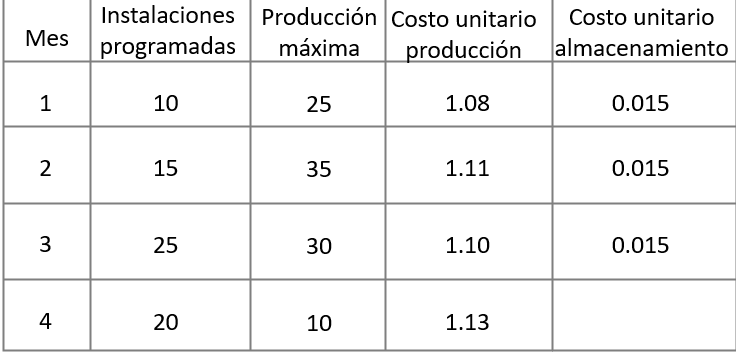

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 02

  Una compañía está planeando fabricar un producto para marzo, abril, mayo y junio del próximo año.
  
  Las cantidades demandadas son 520, 720, 520 y 620 unidades, respectivamente.
  
  La compañía tiene una fuerza de trabajo permanente de 10 empleados, pero puede satisfacer las necesidades de producción fluctuantes contratando y despidiendo trabajadores temporales.
  
  Los costos adicionales de contratar y despedir un trabajador temporal en cualquier mes son de \$200  y \$400, respectivamente. Un trabajador de planta produce 12 unidades por mes; y uno temporal, que no tiene la misma experiencia, produce 10.
  
  La compañía puede producir más de lo necesario en cualquier mes y guardar el excedente para el mes subsiguiente a un costo de retención de \$50 por unidad por mes.
  
  Desarrolle una política óptima de contratación y despido durante el horizonte de planificación de cuatro meses.

(TAHA, 2012, pág. 43)

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 03

Un granjero tiene dos ovejas. Al final de cada año, decide cuántas vender o conservar.

La utilidad de vender una oveja en el año 1 es de \$100, en el año 2 es de \$130 y en el año 3 es de \$120.

Las ovejas conservadas en el año i duplicarán su número en el año i+1.

El granjero planea vender todas las ovejas al cabo de tres años.

¿Cuál debe ser la programación de venta de las ovejas para optimizar las utilidades del granjero?

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 04

Un viticultor en el Valle del Cauca posee dos viñas. Al final de cada año, decide cuántas cepas de vid vender o conservar.

La utilidad de vender una cepa de vid en el año 1 es de \$150, en el año 2 es de \$180 y en el año 3 es de \$170.

Las cepas de vid conservadas en el año  i triplicarán  su número en el año i + 1.

El viticultor planea vender todas las cepas de vid al cabo de tres años.

 ¿Cuál debe ser la programación de venta de las cepas de vid para optimizar las utilidades del viticultor?

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 05

GECO fue contratado por los siguientes cuatro años para que surta motores de avión a razón de cuatro motores al año.

La capacidad de producción disponible y los costos de producción varían de un año a otro. GECO puede producir cinco motores en el año 1, seis en el año 2, tres en el año 3, y cinco en el año 4.

Los costos de producción correspondientes por motor a lo largo de los siguientes cuatro años son de \$300,000, \$330,000, \$350,000 y \$420,000, respectivamente.

GECO puede elegir si produce más de lo que necesita en un cierto año, en cuyo caso el motor se debe almacenar apropiadamente hasta la fecha de envío.

El costo de almacenamiento por motor también varía de un año a otro, y se estima que sea de \$20,000 en el año 1, \$30,000 en el año 2, \$40,000 en el año 3, y \$50,000 en el año 4.

En la actualidad, al inicio del año 1 GECO tiene un motor listo para ser enviado.

Desarrolle un plan de producción que minimice los costos de producción y mantenimiento para GECO.

In [ ]:
# Resuelva en esta celda el ejercicio


## Ejercicio 06

SolarTech ha sido contratada por los próximos cuatro años para suministrar paneles solares a razón de cuatro paneles al año.

La capacidad de producción disponible y los costos de producción varían de un año a otro. SolarTech puede producir cinco paneles en el año 1, seis en el año 2, tres en el año 3 y cinco en el año 4.

Los costos de producción correspondientes por panel a lo largo de los siguientes cuatro años son de \$200,000, \$220,000, \$240,000 y \$280,000, respectivamente.

SolarTech puede elegir producir más de lo que necesita en un cierto año, en cuyo caso los paneles deben almacenarse adecuadamente hasta la fecha de envío.

El costo de almacenamiento por panel también varía de un año a otro, y se estima que sea de \$15,000 en el año 1, \$20,000 en el año 2, \$25,000 en el año 3 y \$30,000 en el año 4.

Objetivo: minimizar los costos de producción y almacenamiento para SolarTech.

In [ ]:
# Resuelva en esta celda el ejercicio
